In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import tables as tb
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

# Load Datasets

In [0]:
train_data = pd.read_csv("prepared_train.csv.gz", compression="gzip")

In [0]:
train_data.head()

,TX,TY,X,Y,Z,event_id,signal,data_ind,TX_pair,TY_pair,X_pair,Y_pair,Z_pair,dTX,dTY,dX,dY,dZ
0,37.049335,369.63428,59937.242,65597.38,3879.0000,187859.0,1.0,301,49.974045,419.48553,59934.250,65567.550,4152.3477,-12.924709,-49.851257,2.992188,29.835938,-273.34766
1,49.974045,419.48553,59934.250,65567.55,4152.3477,185036.0,1.0,301,38.725624,384.33005,59979.156,65964.960,5172.0000,11.248421,35.155487,-44.906250,-397.414060,-1019.65234
2,49.974045,419.48553,59934.250,65567.55,4152.3477,185036.0,1.0,301,34.658695,381.04840,59972.625,65970.060,5172.0000,15.315350,38.437134,-38.375000,-402.515620,-1019.65234
3,49.974045,419.48553,59934.250,65567.55,4152.3477,185036.0,1.0,301,29.467350,374.89084,59963.680,65978.460,5172.0000,20.506695,44.594696,-29.429688,-410.914060,-1019.65234
4,29.467350,374.89084,59963.680,65978.46,5172.0000,187859.0,1.0,301,165.088400,443.50670,59952.004,66185.125,6465.0000,-135.621050,-68.615875,11.675781,-206.664060,-1293.00000


In [0]:
test_data = pd.read_csv("prepared_test.csv.gz", compression="gzip")

In [0]:
test_data.head()

,TX,TX_pair,TY,TY_pair,X,X_pair,Y,Y_pair,Z,Z_pair,data_ind,dTX,dTY,dX,dY,dZ,index
0,-193.08415,-350.33182,623.97590,437.50590,37949.000,38081.850,24967.570,24522.312,0.0,1293.0,0,157.24767,186.47000,-132.85156,445.25780,-1293.0,6
1,-225.43321,-380.56433,-367.23990,458.56284,39335.953,39409.580,49094.970,49534.918,0.0,1293.0,0,155.13112,-825.80273,-73.62500,-439.94922,-1293.0,224
2,-288.54390,-166.98260,744.82184,638.90027,51992.125,51851.540,74045.695,73873.390,0.0,1293.0,0,-121.56131,105.92157,140.58594,172.30469,-1293.0,292
3,-131.04372,-486.17377,-389.96840,107.31708,29508.035,29299.156,67410.984,67238.300,0.0,1293.0,0,355.13007,-497.28550,208.87890,172.68750,-1293.0,325
4,-233.20178,135.40904,573.09534,775.31900,67685.780,67272.016,75164.360,75664.360,0.0,1293.0,0,-368.61084,-202.22363,413.76562,-500.00000,-1293.0,548


# Shower Visualization

In [0]:
CMAP = sns.diverging_palette(220, 20, s=99, as_cmap=True, n=2500)

def plot3D(X, target, elev=0, azim=0, title=None, sub=111):
    x = X[:, 0]
    y = X[:, 1]
    z = X[:, 2]
    
    fig = plt.figure(figsize=(12, 8))
    ax = Axes3D(fig)
    mappab = ax.scatter(x, y, z, c=target, cmap=CMAP)

    if title is not None:
        ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

    # This tool allows you to change your point of view.
    ax.view_init(elev=elev, azim=azim)
    fig.colorbar(mappable=mappab, label='Target variable')
    plt.show()
    
feat_XY = ['TX', 'TY', 'X', 'Y']

In [0]:
first = train_data.loc[train_data.data_ind == 21, :]

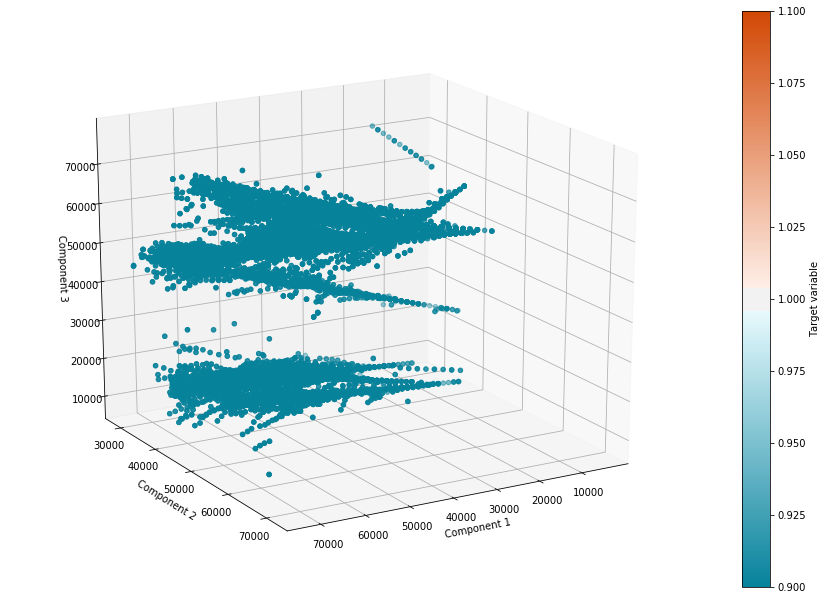

In [0]:
plot3D(first.loc
       [first.signal==1, ['Z', 'X', 'Y']].values,
       first.loc[first.signal==1].signal.values, 
       elev=20, 
       azim=60)

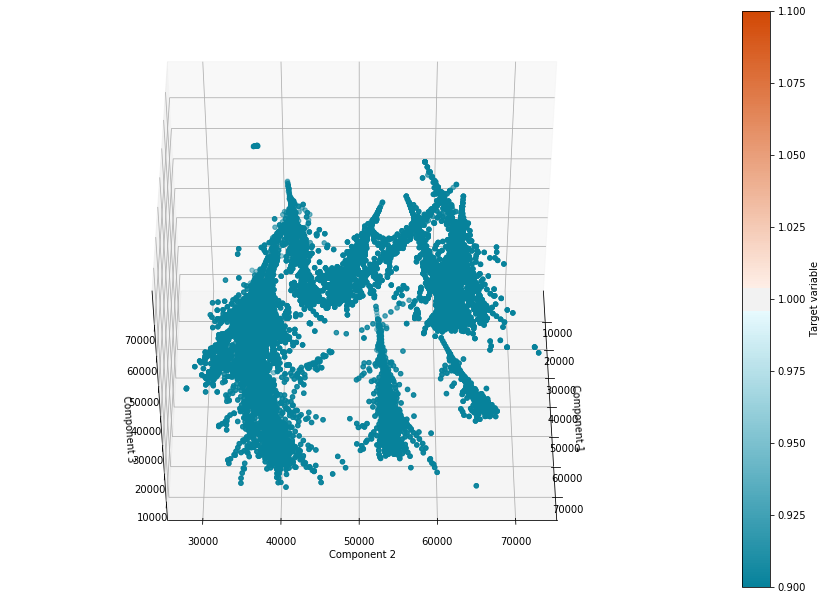

In [0]:
plot3D(first.loc[first.signal==1, ['Z', 'X', 'Y']].values,
       first.loc[first.signal==1].signal.values, 
       elev=45, 
       azim=0)

## Basetrack Distribution Along the Axis

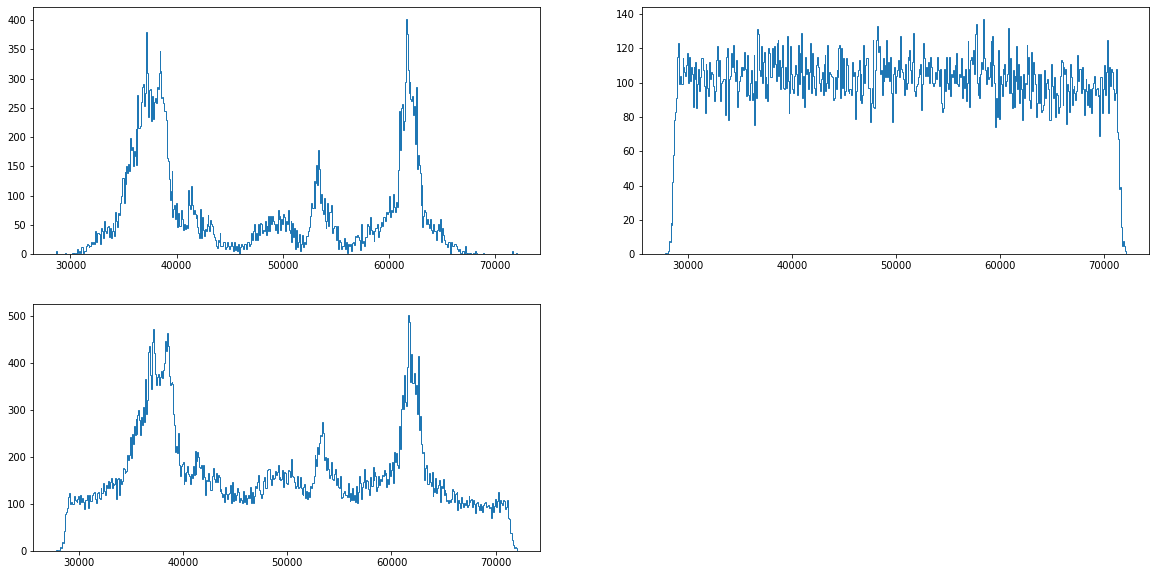

In [0]:
axis = 'X'

fig = plt.figure(figsize = [20, 10])
fig.add_subplot(221)
plt.hist(first.loc[first.signal == 1, axis], bins=500, histtype='step')

fig.add_subplot(222)
plt.hist(first.loc[first.signal == 0, axis], bins=500, histtype='step')

fig.add_subplot(223)
values_X = plt.hist(first.loc[:, axis], bins=500, histtype='step')

plt.show()

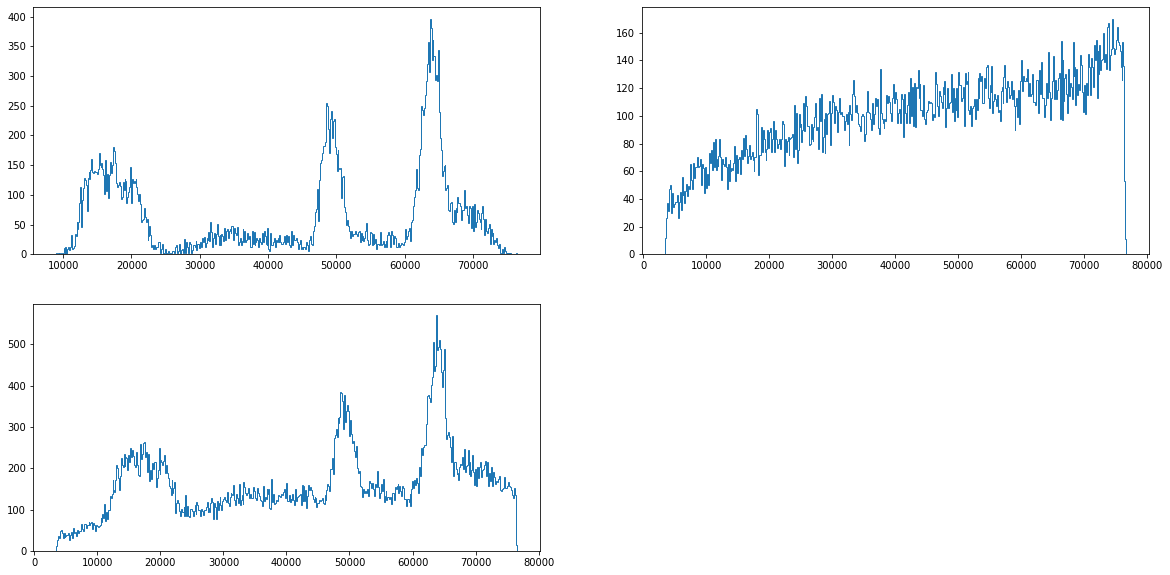

In [0]:
axis = 'Y'

fig = plt.figure(figsize = [20, 10])
fig.add_subplot(221)
plt.hist(first.loc[first.signal == 1, axis], bins=500, histtype='step')

fig.add_subplot(222)
plt.hist(first.loc[first.signal == 0, axis], bins=500, histtype='step')

fig.add_subplot(223)
values_X = plt.hist(first.loc[:, axis], bins=500, histtype='step')

plt.show()

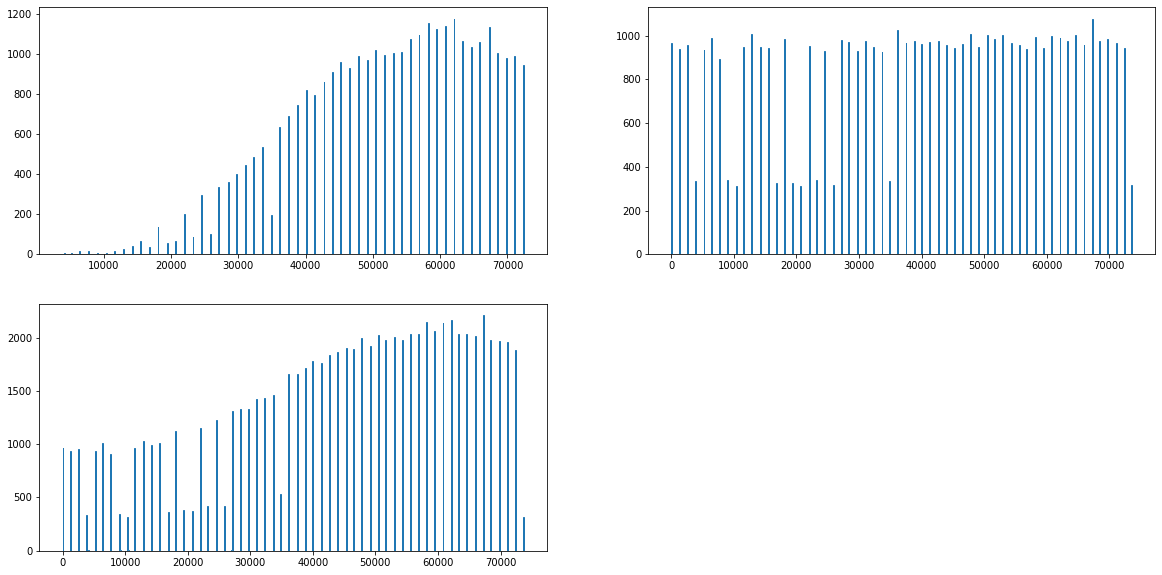

In [0]:
axis = 'Z'

fig = plt.figure(figsize = [20, 10])
fig.add_subplot(221)
plt.hist(first.loc[first.signal == 1, axis], bins=500, histtype='step')

fig.add_subplot(222)
plt.hist(first.loc[first.signal == 0, axis], bins=500, histtype='step')

fig.add_subplot(223)
values_X = plt.hist(first.loc[:, axis], bins=500, histtype='step')

plt.show()

In [0]:
## Distribution of Data in Train & Test Set

In [0]:
varaibles = list(set(test_data.columns) - {"index", "data_ind"})

In [0]:
def insight(colname):
    plt.title(colname.capitalize())
    plt.hist(train_data[colname], bins=50, alpha=0.8, color="blue", density=True, label="Train")
    plt.hist(test_data[colname], bins=50, alpha=0.4, color="red", density=True, label="Test")
    plt.legend()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


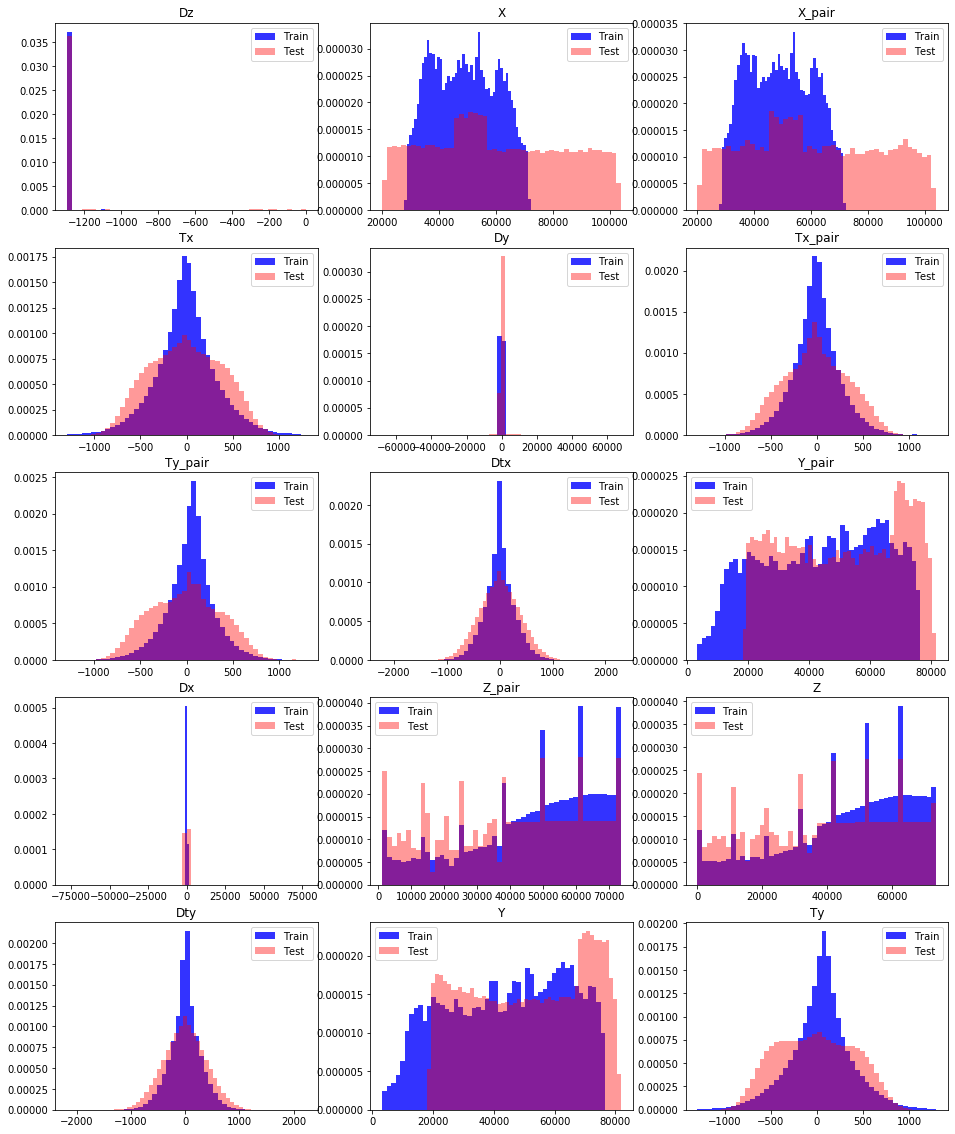

In [0]:
plt.rcParams["figure.figsize"] = 16, 20

for idx, x in enumerate(varaibles):
    plt.subplot(5, 3, idx+1)
    insight(x)

plt.show()

The distribution of the test set and the train set is not similar. I have to try some trasnformation to make the distribution closer to each other.

In [0]:
from sklearn.preprocessing import power_transform

In [0]:
plt.rcParams["figure.figsize"] = 6, 5

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
obj_SC =StandardScaler()
obj_SC.fit(train_data[varaibles])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# Standardize the Values

train_data[varaibles] = obj_SC.transform(train_data[varaibles])
test_data[varaibles]  = obj_SC.transform(test_data[varaibles])

In [0]:
GHOST = lambda x: x

POWER_TRANSFORM = lambda x: power_transform(np.reshape(x, (-1, 1)), method="yeo-johnson")

In [0]:
def insight_func(colname, func1=GHOST, func2=GHOST):
    plt.title(colname.capitalize())
    plt.hist(func1(train_data[colname].values), bins=50, alpha=0.8, color="blue", density=True, label="Train")
    plt.hist(func2(test_data[colname].values), bins=50, alpha=0.4, color="red", density=True, label="Test")
    plt.legend()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.p

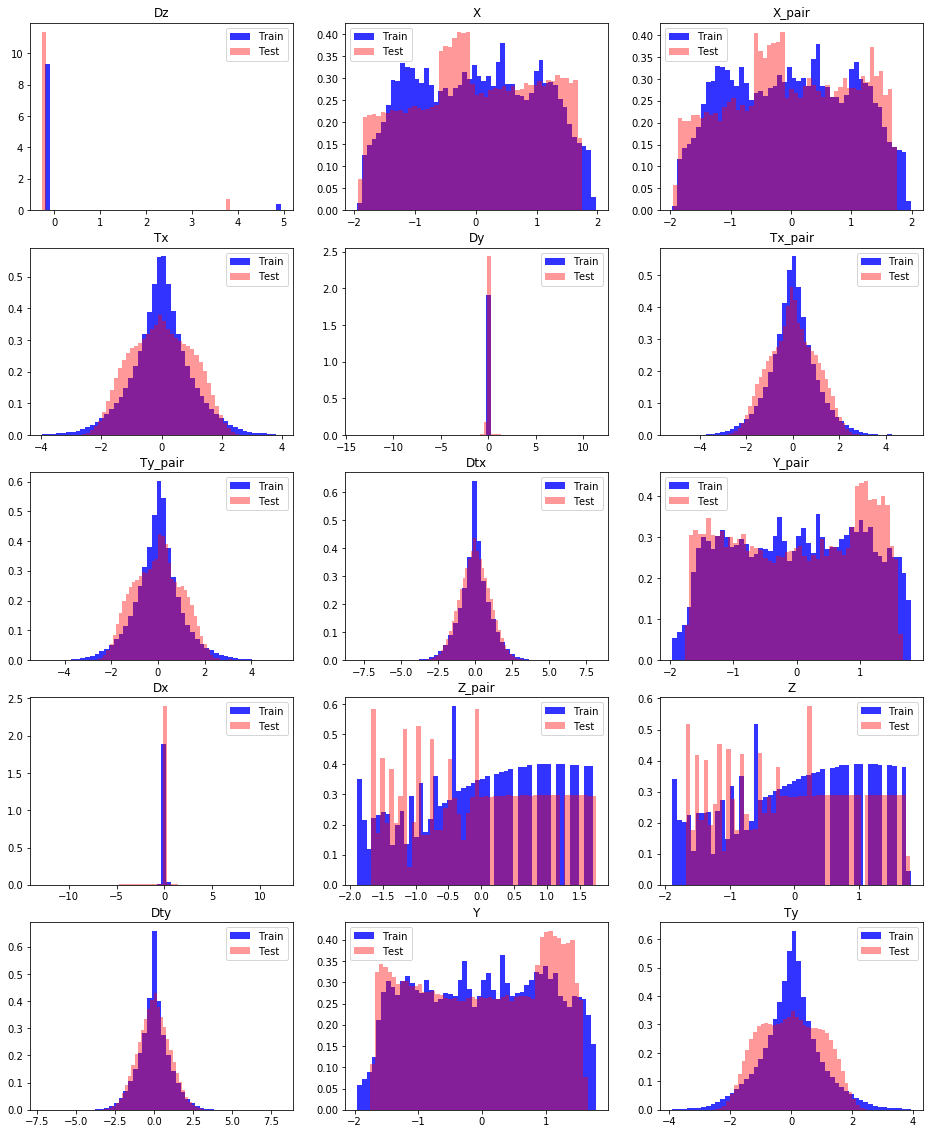

In [26]:
plt.rcParams["figure.figsize"] = 16, 20

for idx, x in enumerate(varaibles):
    plt.subplot(5, 3, idx+1)
    insight_func(x, func1=POWER_TRANSFORM, func2=POWER_TRANSFORM)

plt.show()

Power Transformation has made train data and test data somewhat simialr as comapred to to pre transformation stage.

In [0]:
train_data[varaibles] = power_transform(train_data[varaibles], method="yeo-johnson")
test_data[varaibles] = power_transform(test_data[varaibles], method="yeo-johnson")

In [0]:
train_data.to_csv("training_data_transform.csv.gz", compression="gzip")
test_data.to_csv("testing_data_transform.csv.gz", compression="gzip")